Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 03. Neutron Diffusion from a Sphere Source
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\rhat}{\hat{\boldsymbol{r}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Natural/Natural Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. ["Point Source in Infinite Domain"](#inf-case)
   + [Data](#data-sym)
   + [Finite Element Lagrange Basis Functions](#fembf-sym)
   + [Results](#results-sym)
1. ["Point" Source in a Finite Domain w/ Vacuum Boundary](#vac-case)
   + [Data](#data-vac)
   + [Finite Element Lagrange Basis Functions](#fembf-vac)
   + [Results](#results-vac)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, spherical coordinates, neutron diffusion from a point source problem using two regions.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[0,R]\subset\Reals\rightarrow\Reals$, $u_2:[R,R_\infty]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\frac{1}{r^2}\bigl(-D_1\, r^2 u_1'\bigr)'(r) - \Sigma_{a,1}\,u_1(r) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R[, \\
 -\frac{1}{r^2}\bigl(-D_2\, r^2 u_2'\bigr)'(r) - \Sigma_{a,2}\,u_2(r) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad r\in\ ]R,R_\infty[, \\
 q_{1,n}(0) &= 0, \\
 q_{2,n}(\infty) &= q_{2,n\infty}, \\
 u_1(R) &= u_2(R), \\
 q_{1,n}(R) &= q_{2,n}(R), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(r) = \flux_i(r)\cdot\normal(r) = -D_i\,u_i'(r)\,\rhat \cdot \normal(r) \ \forall \ i=1,2$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[0,R_\infty]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r^2}\bigl(-D(r)\, r^2 u'\bigr)'(r) - \Sigma_a(r)\,u(r) + s_0(r) &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_\infty[, \\
 q_n(0) &= 0, \\
 q_n(R_\infty) &= q_{nR_\infty}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(r)$, macroscopic absorption cross section, $\Sigma_a(r)$, source $s_0(r)$, and normal flux boundary conditions. Where $q_n(r) = \flux(r)\cdot\normal(r) = -D(r)\,u_i'(r)\,\rhat \cdot \normal(r)$.

## [Galerkin Method w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([0,R_\infty]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) + q_n(R_\infty)\,v(R_\infty)\,R^2_\infty &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([0,R_\infty]\bigr), 
\end{align*}

where $H^1\!\bigl([0,R_\infty]\bigr) := \bigl\{ u:[0,R_\infty]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional subspace of $H^1\!\bigl([0,R_\infty]\bigr)$, say $V_N([0,R_\infty]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([0,R_\infty]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(0,R_\infty)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $
  + $b_i = (s_0,\phi_i) - q_{nR_\infty}\,\phi_i(R_\infty)\,R^2_\infty$
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm). In addition, in spherical coordinates, the inner products read

\begin{align*}
\bigl(-D\, u',v'\bigr) &= \int\limits_0^{R_\infty} D(r)\, u'(r)\,v'(r)\, r^2\,dr  \\
\bigl(\Sigma_a\,u,v\bigr) &= \int\limits_0^{R_\infty} \Sigma_a(r)\,u(r)\,v(r)\,r^2\,dr \\
\bigl(s_0,v\bigr) &= \int\limits_0^{R_\infty} s_0(r)\,v(r)\,r^2\,dr
\end{align*}

## ["Point Source in an Infinite Domain"](#toc)<a id="inf-case"></a>

Consider an inner sphere source with a very small radius surrounded by annular region with a large radius. 

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
r_0 = 0*unit.cm 
r_R = .25*unit.cm
r_oo = 25*unit.cm  # infinity

In [3]:
'''Domain'''
def show_domain(r_R, r_oo):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = r_R
    radius_o = r_oo
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1), off_screen=True) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.59,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(1.8)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [4]:
plo = show_domain(r_R, r_oo)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

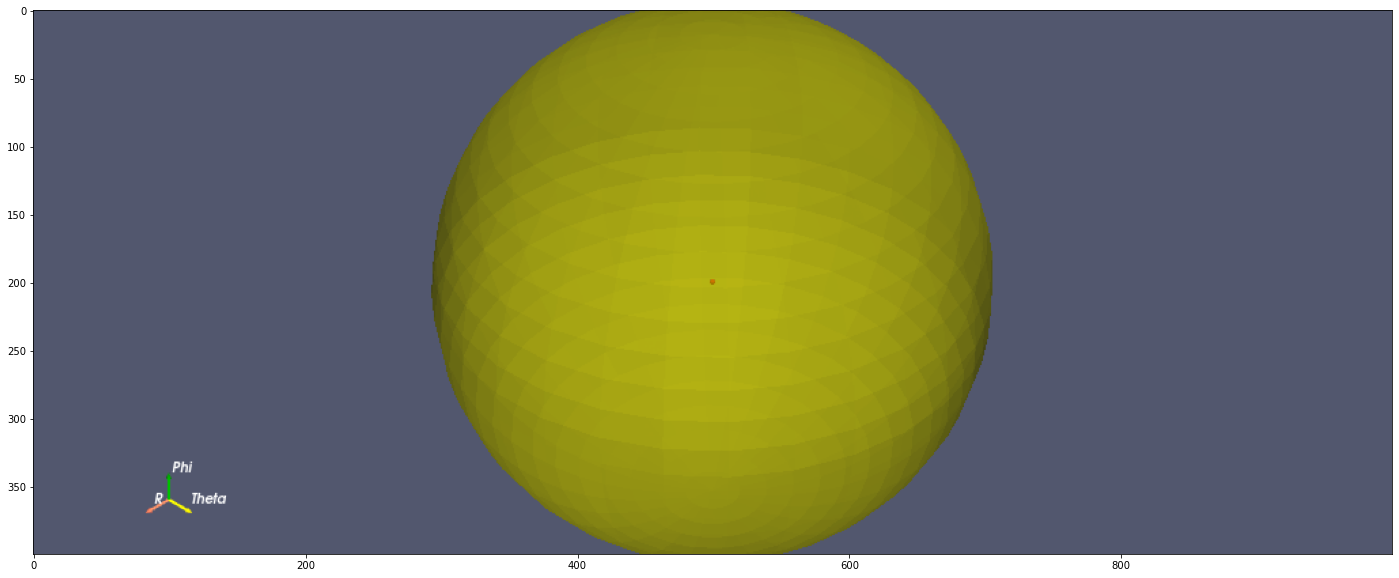

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-sym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $q_{nR_\infty}$


In [6]:
'''Parameters and data'''
import math

# Source
diffusion_coeff_1 = 1.5*unit.cm
sigma_a_1 = 0.005/unit.cm
source_1_dot = 1/unit.second
volume = 4/3*math.pi*(r_R*unit.cm)**3
source_1 = source_1_dot/volume

# Right side material
diffusion_coeff_2 = 1.0*unit.cm
sigma_a_2 = 0.01/unit.cm
source_2 = 0./unit.cm**3/unit.second

# normal flux
q_noo = 0.0*unit.cm**2/unit.second

In [7]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 1.732e+01
L2 [cm] = 1.000e+01


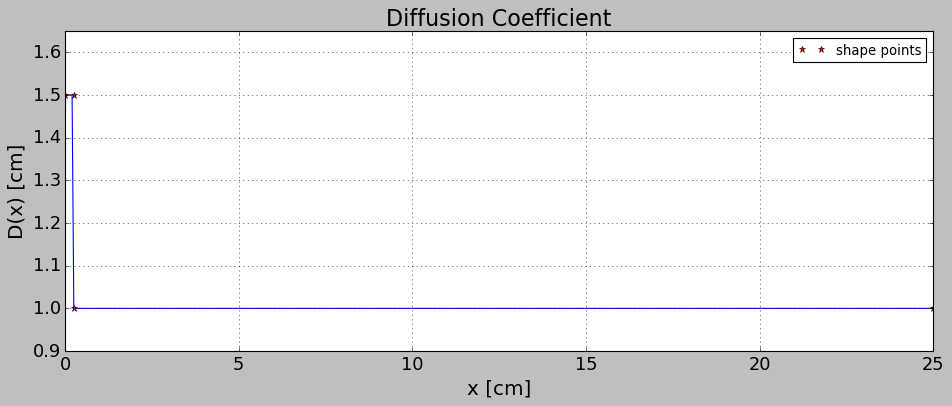

In [8]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_R, diffusion_coeff_1), 
             (r_R, diffusion_coeff_2), (r_oo, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

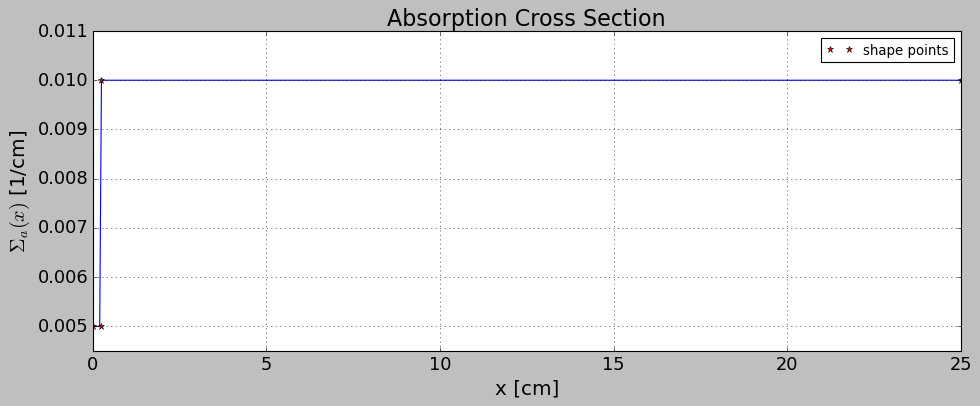

In [9]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_R, sigma_a_1), 
             (r_R, sigma_a_2), (r_oo, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

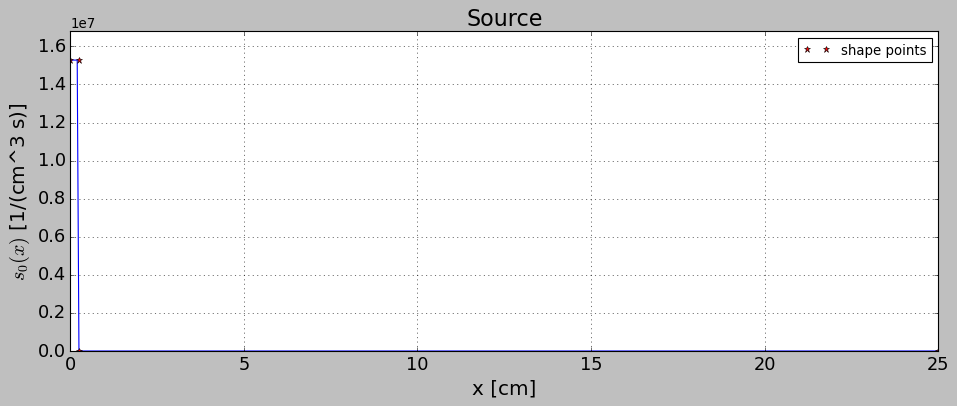

In [10]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_R, source_1), 
             (r_R, source_2), (r_oo, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-sym"></a>

Specify basis functions distribution on the material domain and degree.

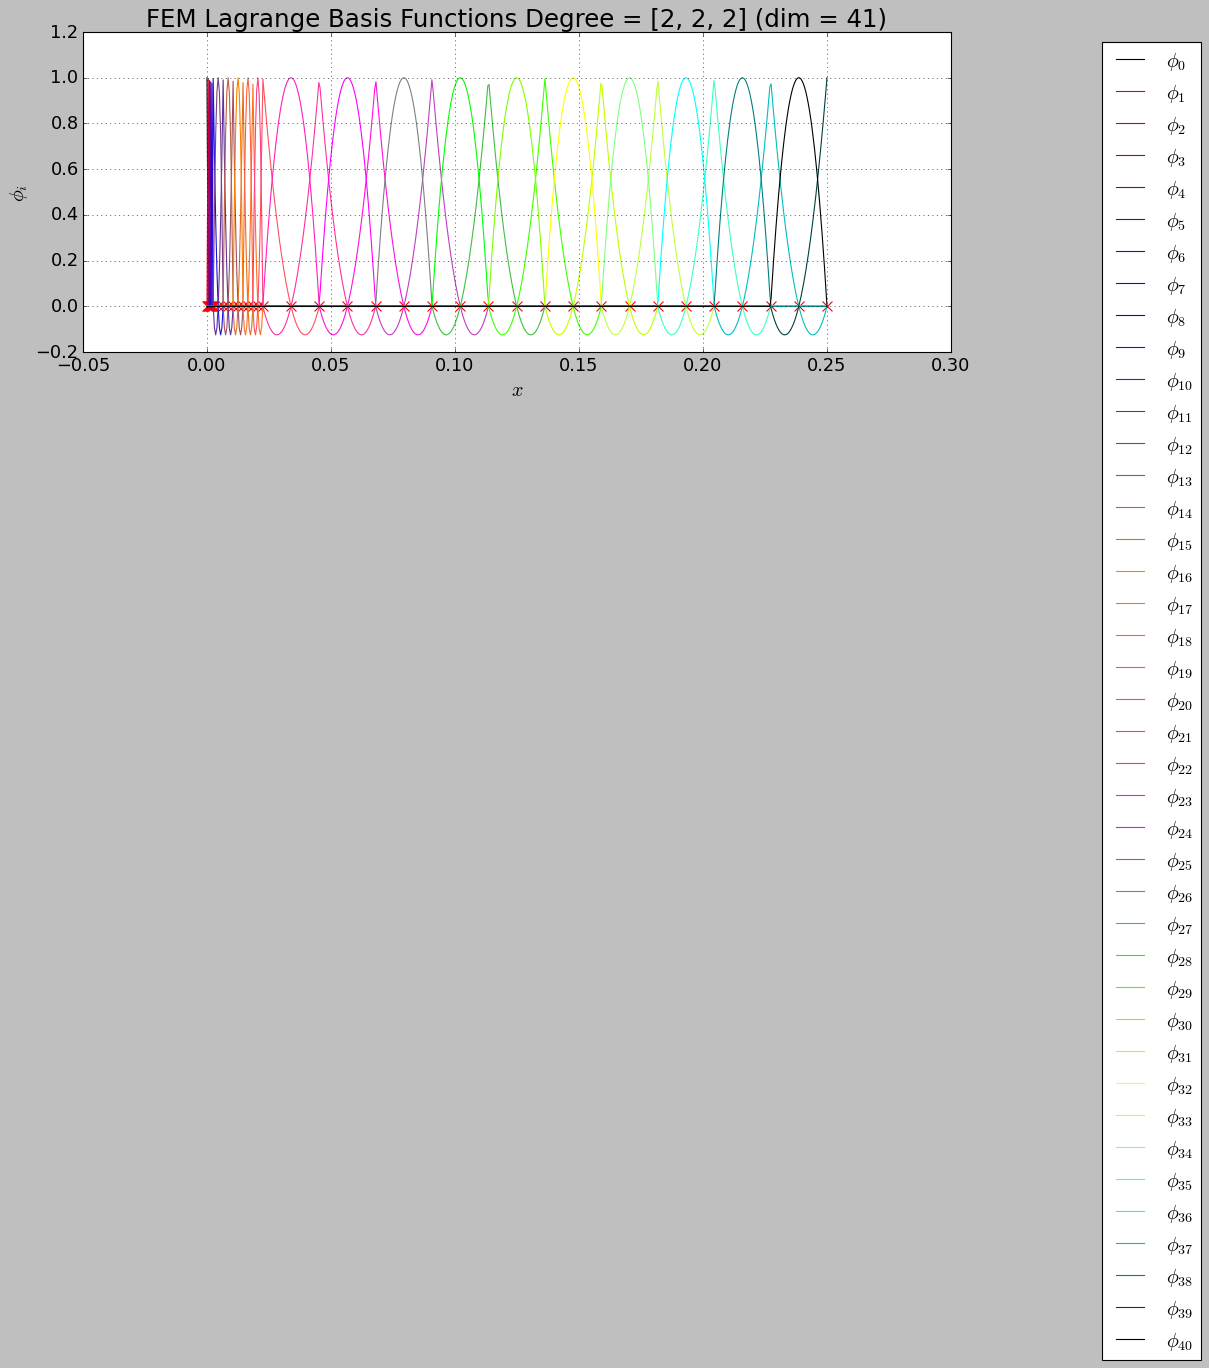

In [11]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,2,2]
n_elem = [5,5,10]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_R, r_R+2*unit.cm, r_oo], bc_x_min='neumann', bc_x_max='neumann')
femlb.plot(n_plot_pts=500)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [12]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='spherical')
a_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='spherical')

a_mtrx = d_mtrx + a_mtrx

In [13]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is rank deficient.
41 (41, 41)


 + $b_i = (s_0,\phi_i) - q_{nR_\infty}\,\phi_i(R_\infty)\,R^2_\infty$

In [14]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='spherical')
qnoo_vec = femlb.boundary_inner_product_vector('right', lambda x: q_noo * r_oo**2, 'v')

b_vec = s_vec - qnoo_vec

In [15]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [16]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [17]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-sym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

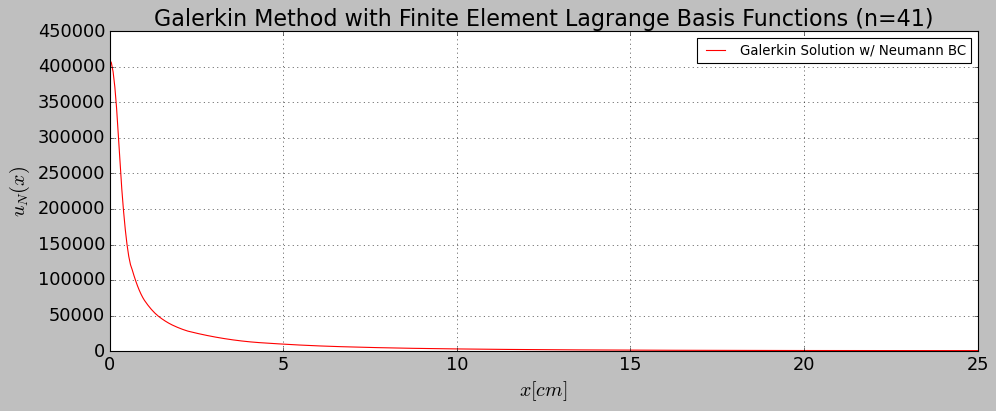

In [18]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(r_0, r_oo, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x [cm]$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [19]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N:')
print('u^*_N(0) [cm^2/s]= ', u_star(0)*unit.cm**2*unit.second, '  u^*_N(Roo) [cm^2/s]= ', u_star(r_oo)*unit.cm**2*unit.second)
print('')
print("u^*'_N")
print("u^*'_N(0) [cm/s]= ", u_prime_star(0)*unit.cm*unit.second, " u^*'_N(Roo) [cm/s]= ", u_prime_star(r_oo)*unit.cm*unit.second)
print('')
print('x=0')
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N:
u^*_N(0) [cm^2/s]=  [409932.2296]   u^*_N(Roo) [cm^2/s]=  [857.64063]

u^*'_N
u^*'_N(0) [cm/s]=  [808.2978]  u^*'_N(Roo) [cm/s]=  [3668.92149]

x=0
u^*_N(0) [cm^2/s]=  [409932.2296]
u^*'_N(0) [cm/s]=  [808.2978]


For an infinitesimal point source (class notes), there is a singularity at the origin: $\phi_{1} (r) = \frac{\dot{s}_0}{4\pi\,D_1\,r}\,e^{\frac{-r}{L_1}}$ where $\dot{s}_0 = \lim_{\delta\rightarrow 0^+} \delta^3\,s_0^{(1)}$ with $\delta$ as the radius of the source.

For an infinitesimal point source, the limit obtained is $\bigl(4\pi\,r^2\,q_{1}(r)\bigr)\bigr|_0 = \dot{s}_0$.

In [20]:
'''Error on 4\pi r^2 q_n1(0) for a point source'''

import math
s1_dot_limit = source(r_R*.99) * r_R**3 
print('(s_dot-s_dot_limit relative error [%]= ', abs(-(-diffusion_coeff_1*u_prime_star(r_R))*4*math.pi*r_R**2-s1_dot_limit/s1_dot_limit*100))

(s_dot-s_dot_limit relative error [%]=  [23477649.79425]


This shows that the singular case is not approached by the symmetry boundary condition.

In [21]:
'''Flux at origin boundary'''

print('q_n0 given    [cm2/s]= ', 0)
print('q_n0 computed [cm2/s]= ', -(-diffusion_coeff(0)*u_prime_star(0))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_n0 given    [cm2/s]=  0
q_n0 computed [cm2/s]=  [0.12124]


In [22]:
'''Flux at right boundary'''

print('q_noo given    [cm^2/s]= ', q_noo)
print('q_noo computed [cm^2/s]= ', -diffusion_coeff(r_oo)*u_prime_star(r_oo)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_noo given    [cm^2/s]=  0.0
q_noo computed [cm^2/s]=  [-0.36689]


## ["Point" Source in a Finite Domain w/ Vacuum Boundary](#toc)<a id="vac-case"></a>

Consider an inner sphere source with a small radius surrounded by annular region with a finite radius exposed to vacuum. 

The boundary normal flux boundary conditions are as follows:

\begin{align*}
 q_n(0) &= 0, \\
 q_n(R_b) &= \frac{u(R_b)}{2}.
\end{align*}

### [Data](#toc)<a id="data-vac"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$


In [23]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [24]:
'''Domain'''
r_0 = 0*unit.cm 
r_R = .25*unit.cm
r_b = 10*unit.cm

In [25]:
plo = show_domain(r_R, r_b)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

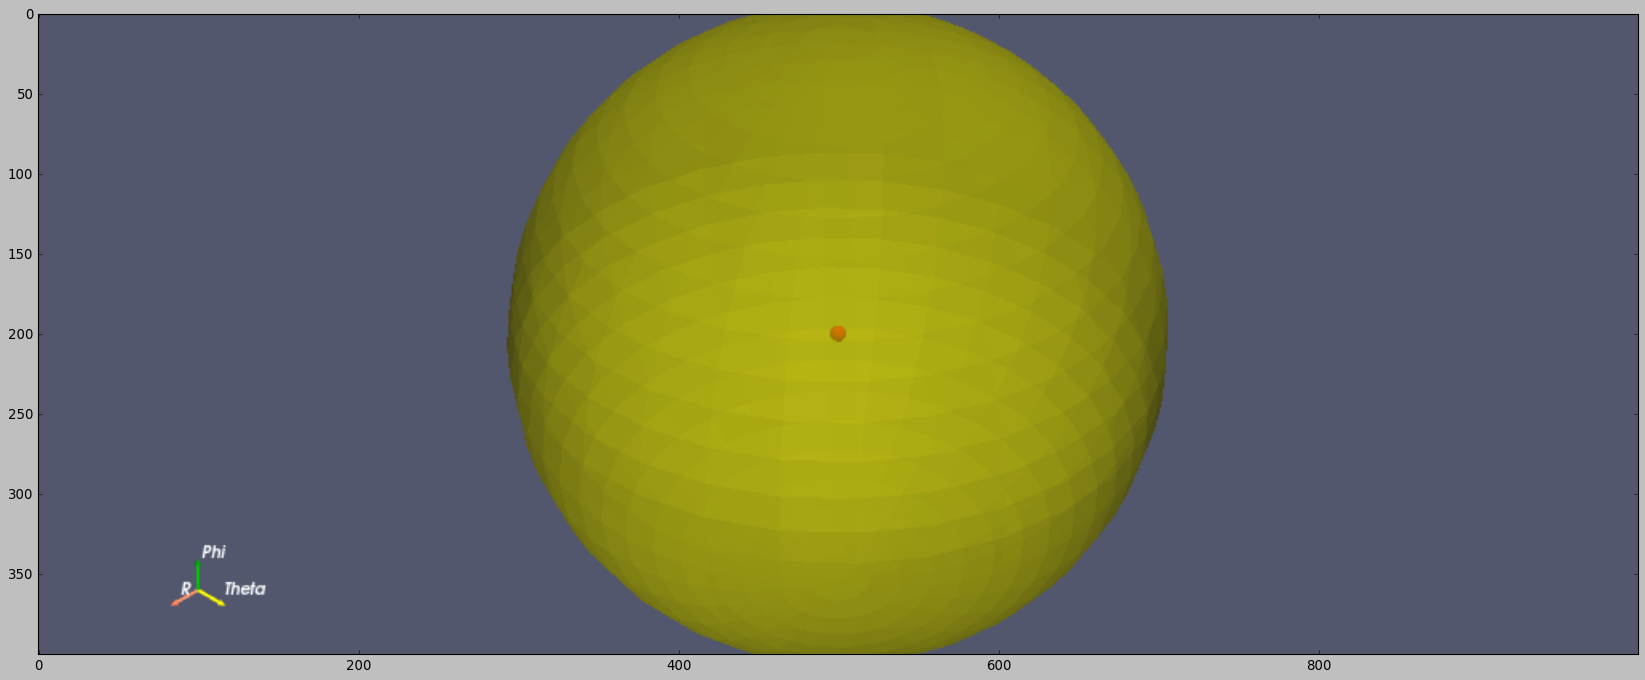

In [26]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

In [27]:
'''Parameters and data'''

# Source
diffusion_coeff_1 = 1.5*unit.cm
sigma_a_1 = 0.005/unit.cm
source_1_dot = 1/unit.second
volume = 4/3*math.pi*(r_R*unit.cm)**3
source_1 = source_1_dot/volume

# Right side material
diffusion_coeff_2 = 1.0*unit.cm
sigma_a_2 = 0.01/unit.cm
source_2 = 0./unit.cm**3/unit.second

In [28]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 1.732e+01
L2 [cm] = 1.000e+01


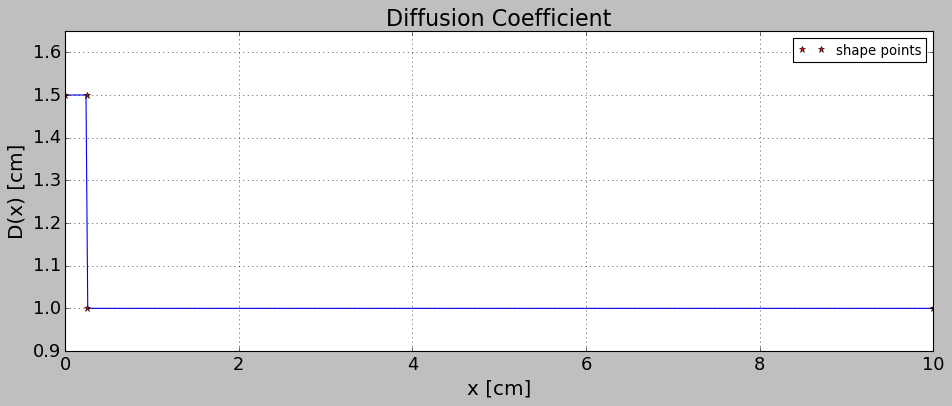

In [29]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_R, diffusion_coeff_1), 
             (r_R, diffusion_coeff_2), (r_b, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

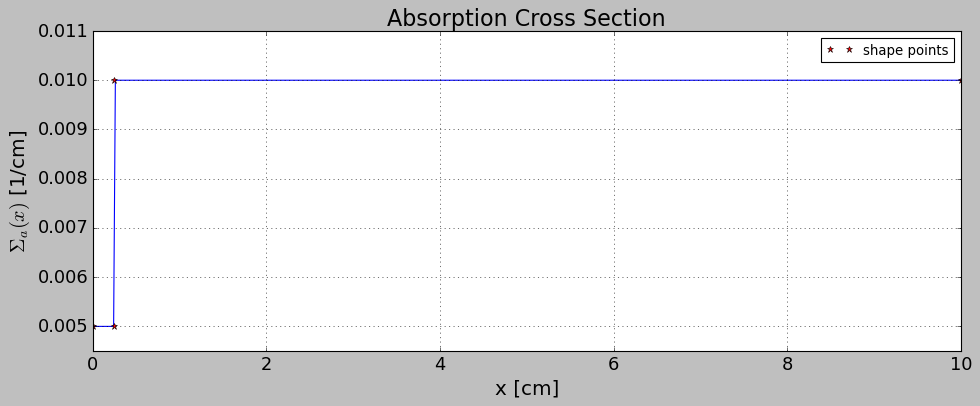

In [30]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_R, sigma_a_1), 
             (r_R, sigma_a_2), (r_b, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

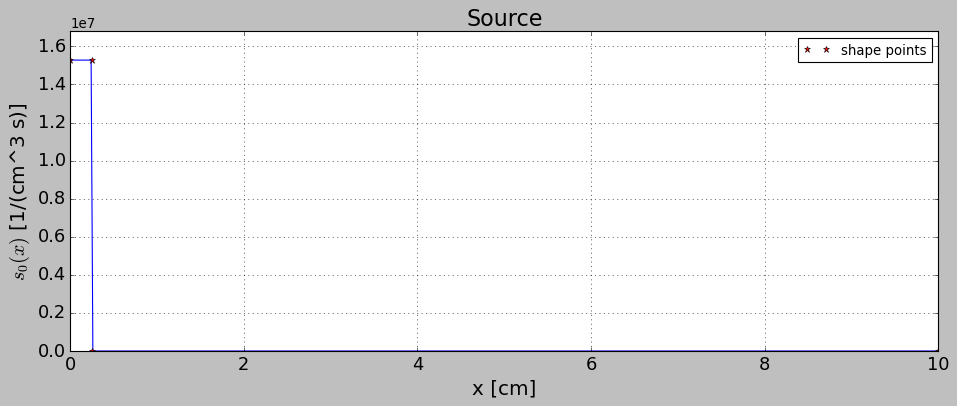

In [31]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_R, source_1), 
             (r_R, source_2), (r_b, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-vac"></a>

Specify basis functions distribution on the material domain and degree.

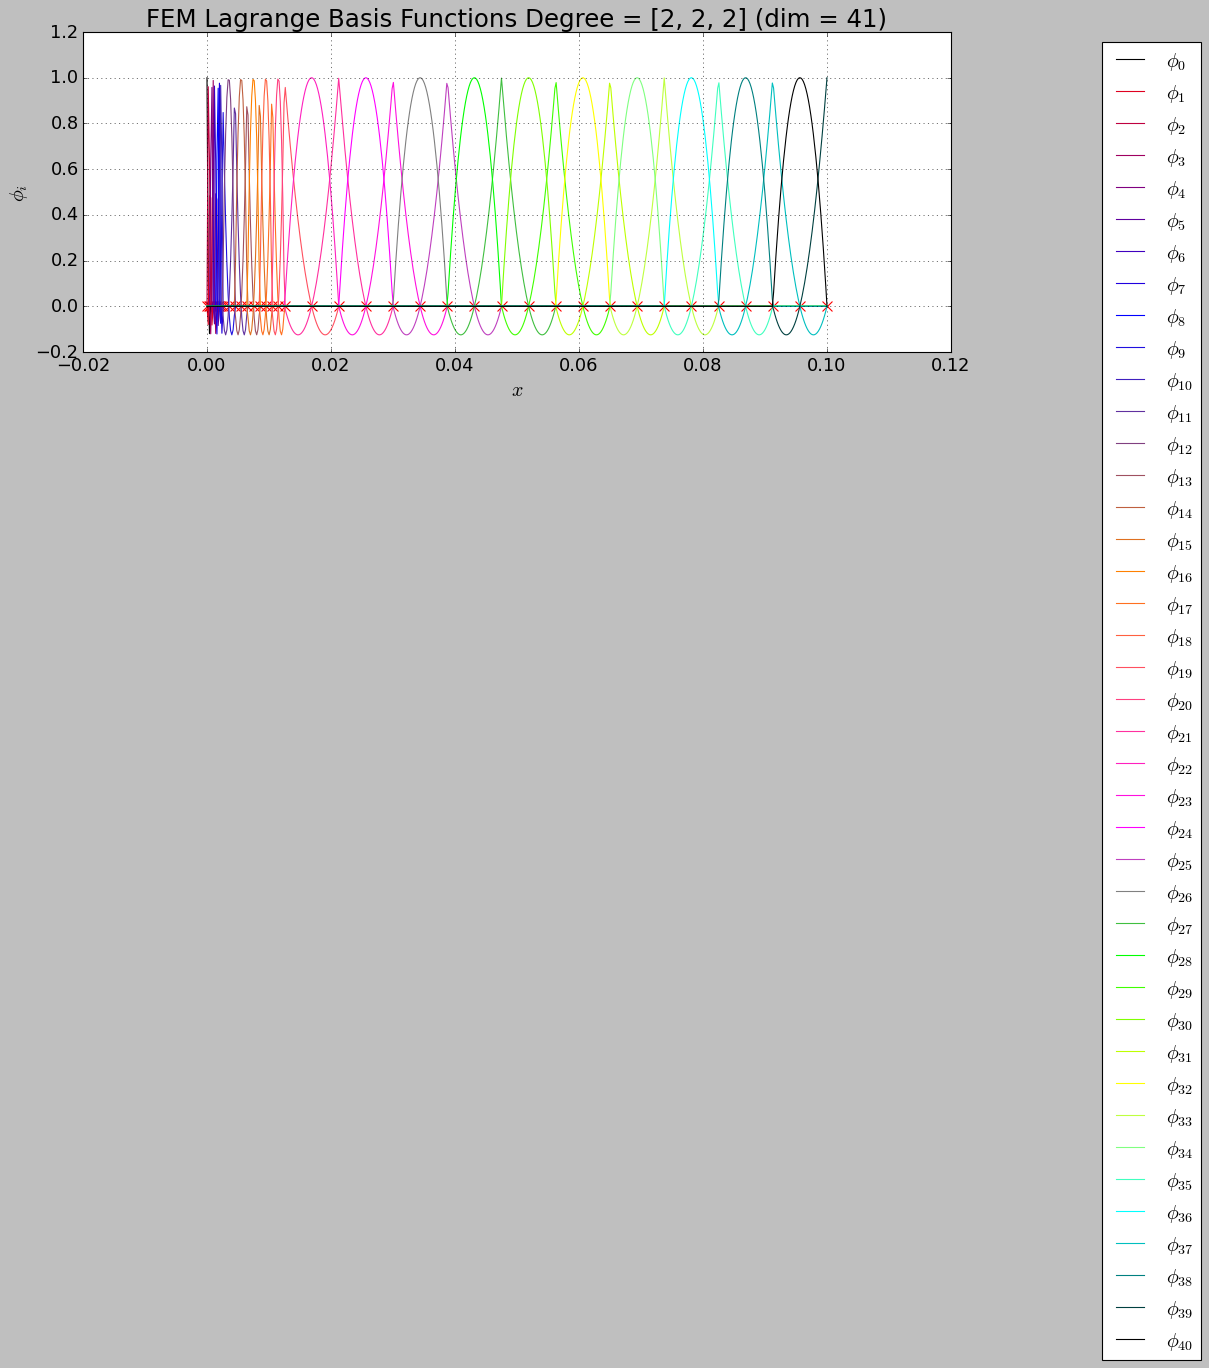

In [32]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,2,2]
n_elem = [5,5,10] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_R, r_R+1*unit.cm, r_b])
femlb.plot(n_plot_pts=500)

  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_b)\,\phi_i(R_b)\,R^2_b $

In [33]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='spherical')
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='spherical')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2*r_b**2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [34]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx,tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is rank deficient.


 + $b_i = \bigl(s_0,\phi_i\bigr)$

In [35]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='spherical')

b_vec = s_vec

In [36]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [37]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [38]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-vac"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

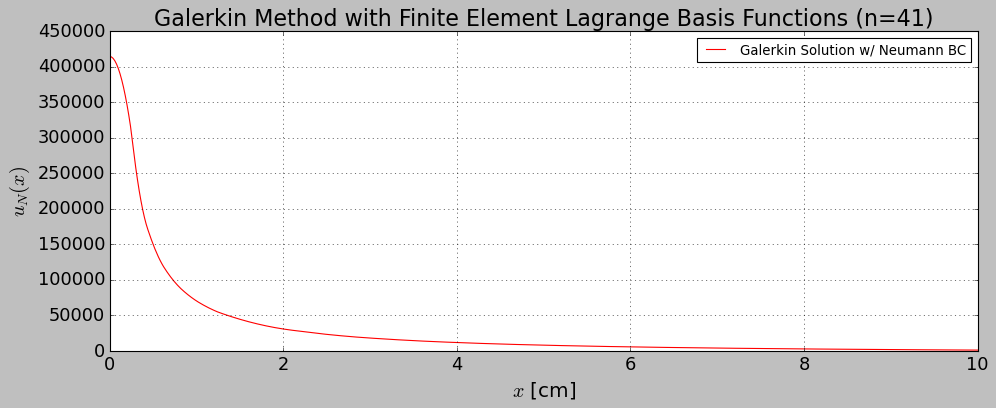

In [39]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(r_0, r_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$ [cm]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [40]:
np.set_printoptions(precision=5)
print('u^*_N:')
print('u^*_N(0) [cm^2/s]= ', u_star(0)*unit.cm**2*unit.second, '  u^*_N(Rb) [cm^2/s]= ', u_star(r_b)*unit.cm**2*unit.second)
print('')
print("u^*'_N")
print("u^*'_N(0) [cm/s]= ", u_prime_star(0)*unit.cm*unit.second, " u^*'_N(Rb) [cm/s]= ", u_prime_star(r_b)*unit.cm*unit.second)
print('')
print('x=0')
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N:
u^*_N(0) [cm^2/s]=  [414249.87341]   u^*_N(Rb) [cm^2/s]=  [1274.73028]

u^*'_N
u^*'_N(0) [cm/s]=  [808.29643]  u^*'_N(Rb) [cm/s]=  [-6340088.61565]

x=0
u^*_N(0) [cm^2/s]=  [414249.87341]
u^*'_N(0) [cm/s]=  [808.29643]


In [41]:
'''Flux at origin boundary'''

print('q_n0 given    [cm2/s]= ', 0)
print('q_n0 computed [cm2/s]= ', -(-diffusion_coeff(0)*u_prime_star(0))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_n0 given    [cm2/s]=  0
q_n0 computed [cm2/s]=  [0.12124]


In [42]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', 1/2*u_star(r_b)*unit.cm**2*unit.second)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(r_b)*u_prime_star(r_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  [637.36514]
q_nb computed [cm^2/s]=  [634.00886]
